<a href="https://colab.research.google.com/github/rgprado/Mineracao_de_Texto_na_Web_Coleta_de_Dados/blob/main/Series_Temporais_aula1_202201_Rodrigo_Prado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Análise de Séries Temporais
 
 Professor: Domingos Santos

 Rodrigo Prado

 Atividade 1

 - selecionar 2 séries: uma financeira e uma adicional (sugestão, uma disponível no pydataset)
 - plot da média movél 
 - análise de quais componentes foram observados nas séries (Tendência, Sazonalidade e ciclos)
 - Calcularem o ACF e PACF das séries
 - analisar a série "sem_nome", identificar os componentes e defina essa série 

In [ ]:
!pip install yfinance pydataset

In [124]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (20,10)

In [125]:
example_ma = [1,2,3,4,5,6,7,8,9,10]
ma_size=2

for i in range(ma_size, len(example_ma)):
  consider_val = example_ma[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}, valor atual {i}')

valores considerados: [1, 2], MA 1.5, valor atual 2
valores considerados: [2, 3], MA 2.5, valor atual 3
valores considerados: [3, 4], MA 3.5, valor atual 4
valores considerados: [4, 5], MA 4.5, valor atual 5
valores considerados: [5, 6], MA 5.5, valor atual 6
valores considerados: [6, 7], MA 6.5, valor atual 7
valores considerados: [7, 8], MA 7.5, valor atual 8
valores considerados: [8, 9], MA 8.5, valor atual 9


Definição da função para cálculo da média movel

In [126]:
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

## Análise Financeira

In [127]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return  df.history(period="max")

In [128]:
df_berkshire = get_yfinance('BRK-A')

In [129]:
df_berkshire

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,290.0,310.0,290.0,290.0,10000,0.0,0.0
1980-03-18 00:00:00-05:00,290.0,290.0,290.0,290.0,0,0.0,0.0
1980-03-19 00:00:00-05:00,290.0,310.0,290.0,290.0,20000,0.0,0.0
1980-03-20 00:00:00-05:00,290.0,290.0,290.0,290.0,0,0.0,0.0
1980-03-21 00:00:00-05:00,290.0,290.0,290.0,290.0,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,476224.0,479698.0,474512.0,479420.0,3500,0.0,0.0
2023-01-11 00:00:00-05:00,482167.0,484897.0,478730.0,483990.0,3600,0.0,0.0
2023-01-12 00:00:00-05:00,486177.0,488688.0,480600.0,482860.0,3800,0.0,0.0


**Análise:**

No gráfico de fechamento das ações da Berkshire Hathaway podemos observar uma tendência positiva na valorização das ações.

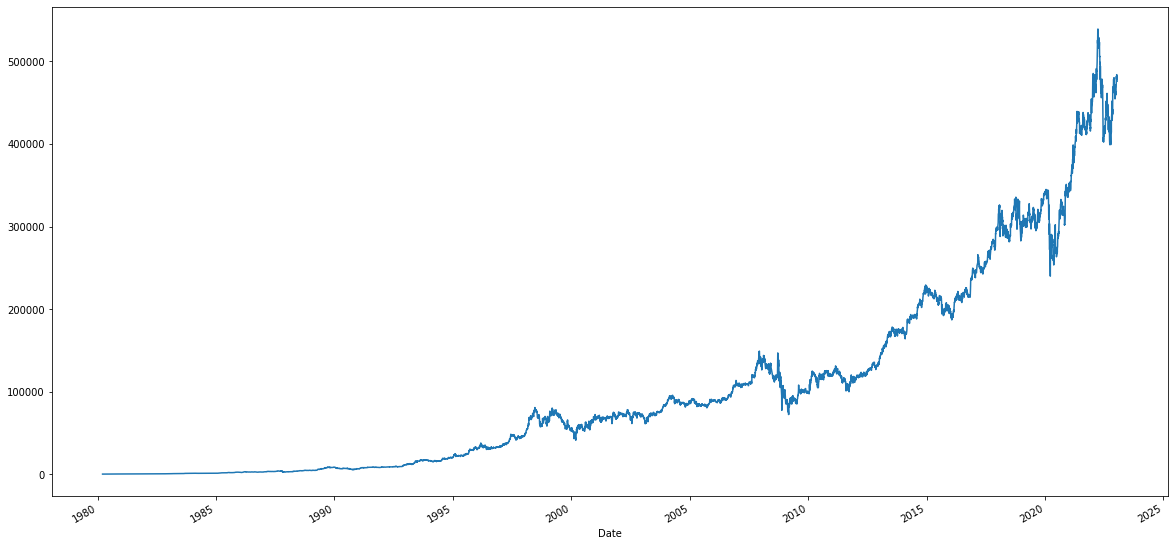

In [130]:
df_berkshire['Close'].plot()

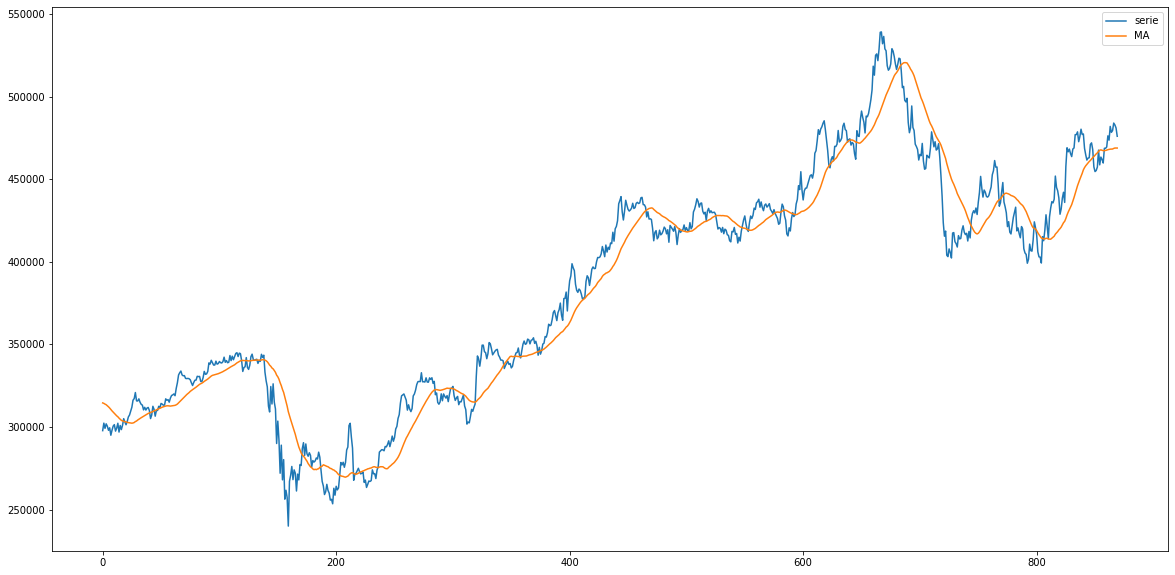

In [131]:
ts = df_berkshire['Close'].iloc[-900:]
ma_size=30
show_trend(ts, ma_size)

**Análise**:

No gráfico de correlação acumulada, aparentemente existe uma correlação muit forte entre os dias, analisado com um lag de 20.

Mas fazendo a análise parcial da correlação, podemos ver que o gráfico apresenta uma característica "Random Walk", correlação forte com t-1, porém o restante bastante variado e com média próxima de zero.

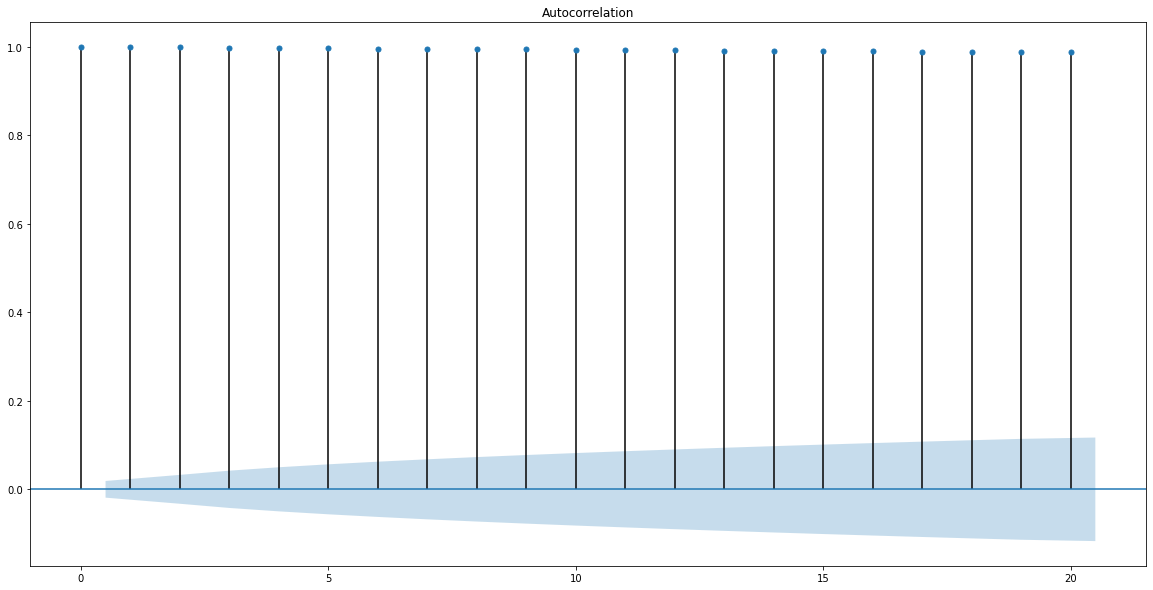

In [132]:
sm.graphics.tsa.plot_acf(df_berkshire['Close'].values.squeeze(), lags=20)
plt.show()

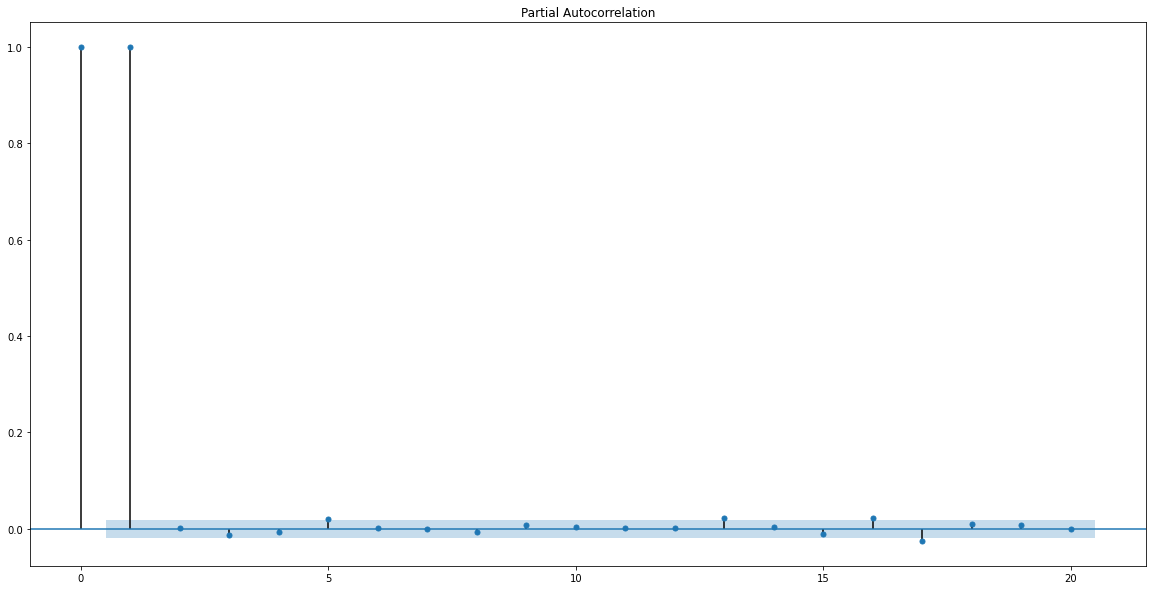

In [133]:
sm.graphics.tsa.plot_pacf(df_berkshire['Close'].values.squeeze(), lags=20)

plt.show()

## Análise uma série temporal do pydataset

In [134]:
timeseries_titles = ['AirPassengers', 'nottem', 'ambientNOxCH', 'acme', 'sunspot.year', 'UKDriverDeaths', 
                    'USAccDeaths', 'UKgas', 'JohnsonJohnson', 'Nile', 'LakeHuron', 'austres', 
                    'lynx', 'deaths', 'drivers']
                    
df_ukdrivers = data('UKDriverDeaths')

print(len(timeseries_titles))

15


In [135]:
data('UKDriverDeaths', show_doc=True )

UKDriverDeaths

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Road Casualties in Great Britain 1969–84

### Description

`UKDriverDeaths` is a time series giving the monthly totals of car drivers in
Great Britain killed or seriously injured Jan 1969 to Dec 1984. Compulsory
wearing of seat belts was introduced on 31 Jan 1983.

`Seatbelts` is more information on the same problem.

### Usage

    UKDriverDeaths
    Seatbelts

### Format

`Seatbelts` is a multiple time series, with columns

`DriversKilled`

car drivers killed.

`drivers`

same as `UKDriverDeaths`.

`front`

front-seat passengers killed or seriously injured.

`rear`

rear-seat passengers killed or seriously injured.

`kms`

distance driven.

`PetrolPrice`

petrol price.

`VanKilled`

number of van (‘light goods vehicle’) drivers.

`law`

0/1: was the law in effect that month?

### Source

Harvey, A.C. (1989) _Forecasting, Structural Time Series Models and the Kalman
Filter._ Ca

In [136]:
df_ukdrivers['date'] = pd.date_range(start ='1969-01-01', end='1985-01-01', freq='M')

In [137]:
df_ukdrivers.set_index('date', inplace=True)

**Análise**:

No gráfico de mortes mensais no Reino Unido não há tendência, mas aparentemente existe uma sazonalidade e ciclo. Confirmado nos gráficos de média mensal.

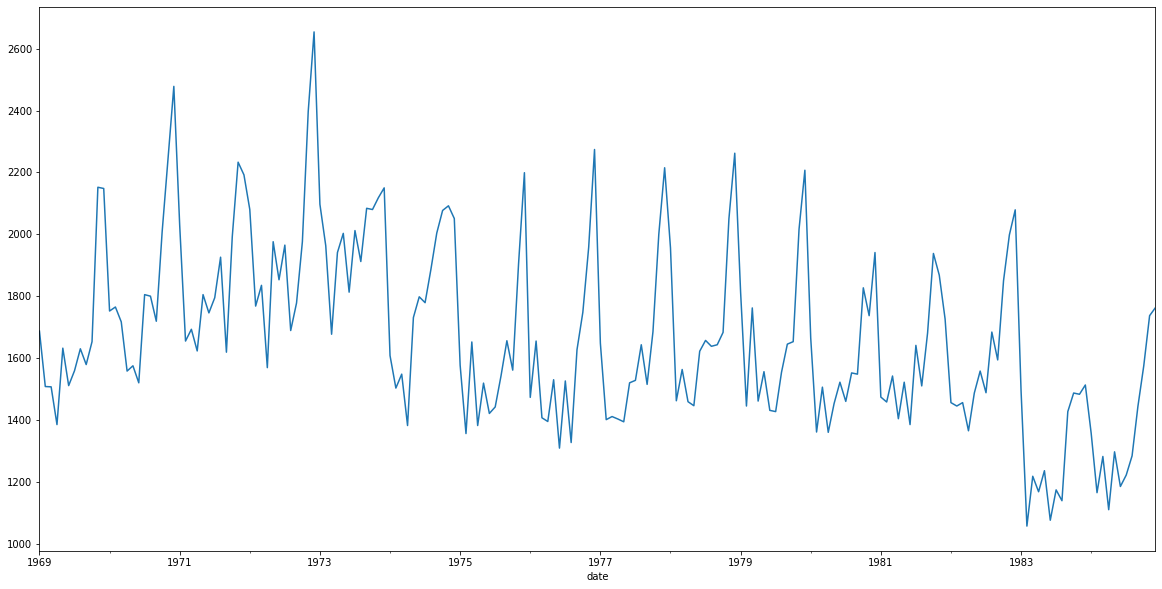

In [138]:
df_ukdrivers['UKDriverDeaths'].plot()

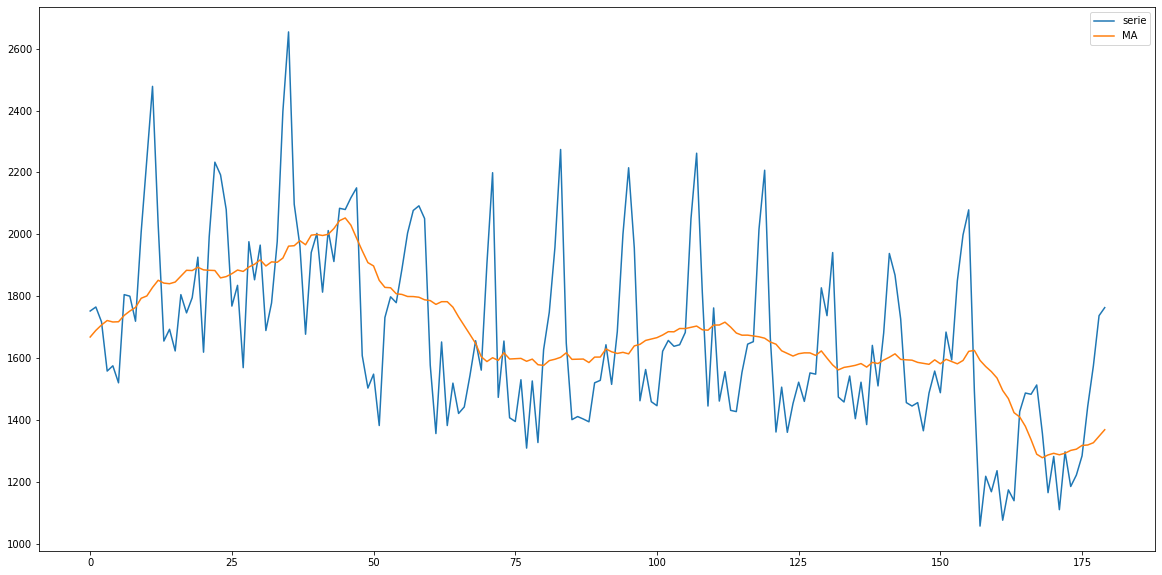

In [139]:
ts = df_ukdrivers['UKDriverDeaths']
ma_size=12
show_trend(ts, ma_size)

**Análise**:

No gráfico de correlação acumulada, aparentemente existe uma correlação muito forte a cada 12 meses, indicando uma sazonalidade.

Na análise parcial da correlação, podemos ver que o gráfico apresenta uma característica de sazonalidade também, mas com correlação mais fraca nos depois de 12 e 24 meses.

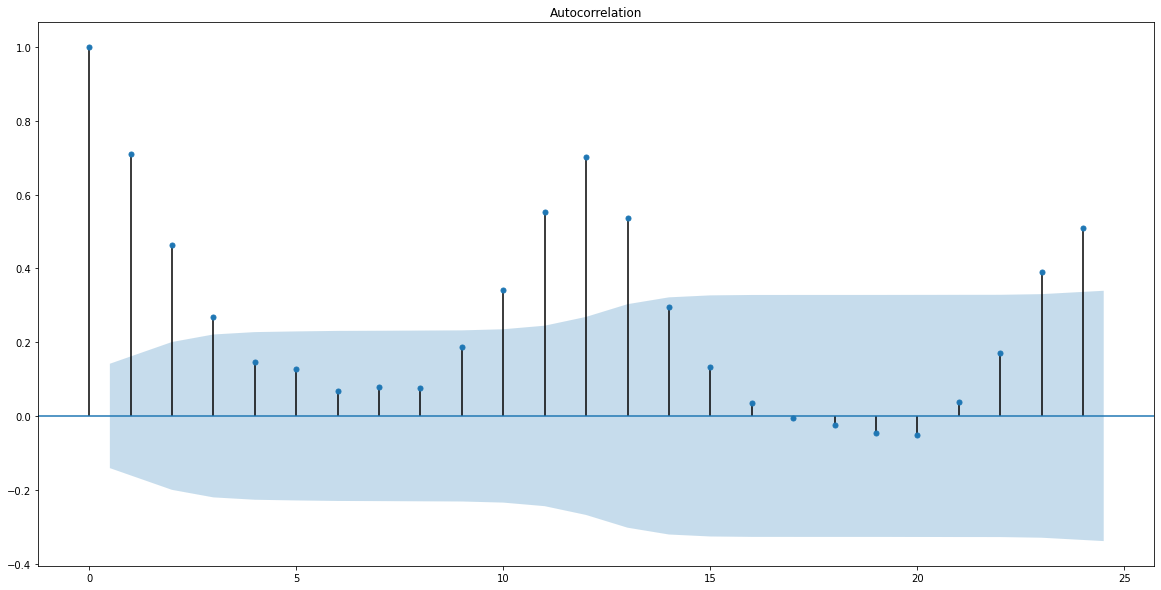

In [140]:
sm.graphics.tsa.plot_acf(df_ukdrivers['UKDriverDeaths'].values.squeeze(), lags=24)

plt.show()

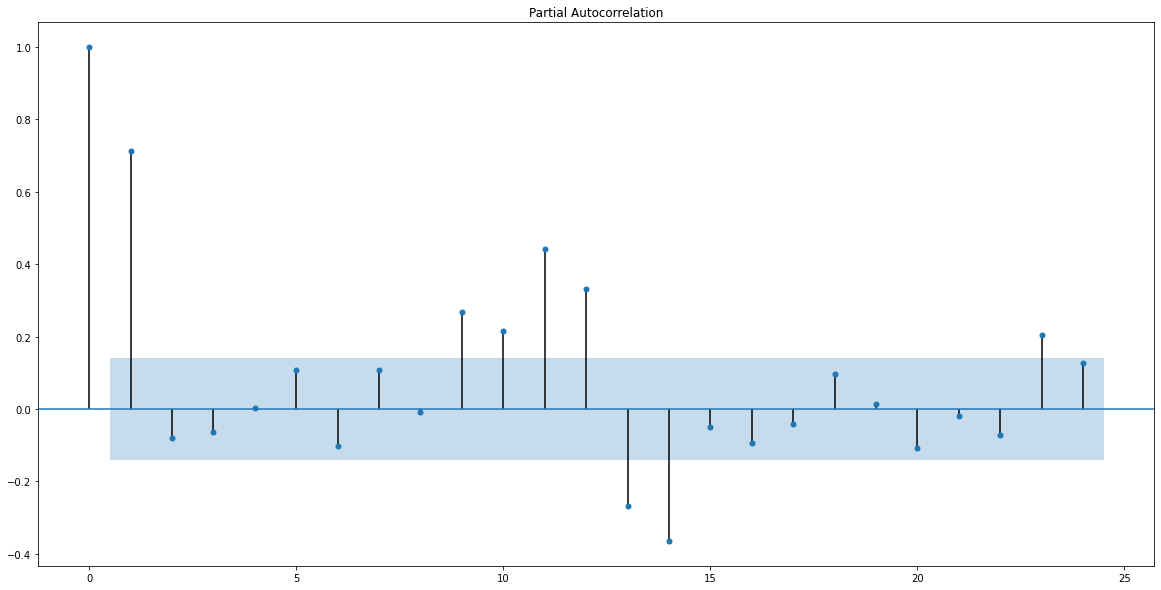

In [141]:
sm.graphics.tsa.plot_pacf(df_ukdrivers['UKDriverDeaths'].values.squeeze(), lags=24)

plt.show()

## Análise da série temporal sem nome

In [142]:
df_sem_nome = pd.read_csv('sem_nome.csv')
df_sem_nome

,Unnamed: 0,actual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923
...,...,...
995,995,-1.343438
996,996,0.199716
997,997,0.639731
998,998,1.013807


**Análise**:

Na plotagem de todos os dados temporais, aparentemente não há uma tendência, mesmo fazendo um corte dos últimos 200 dados, difícil analisar se existe uma sazonalidade e ciclos.

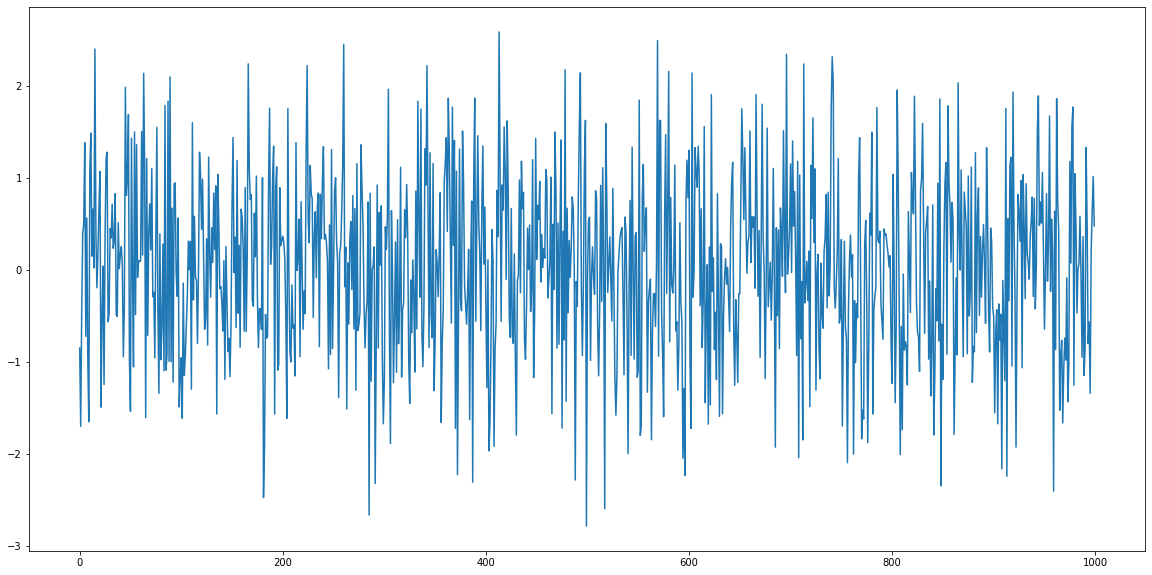

In [143]:
df_sem_nome['actual'].plot()

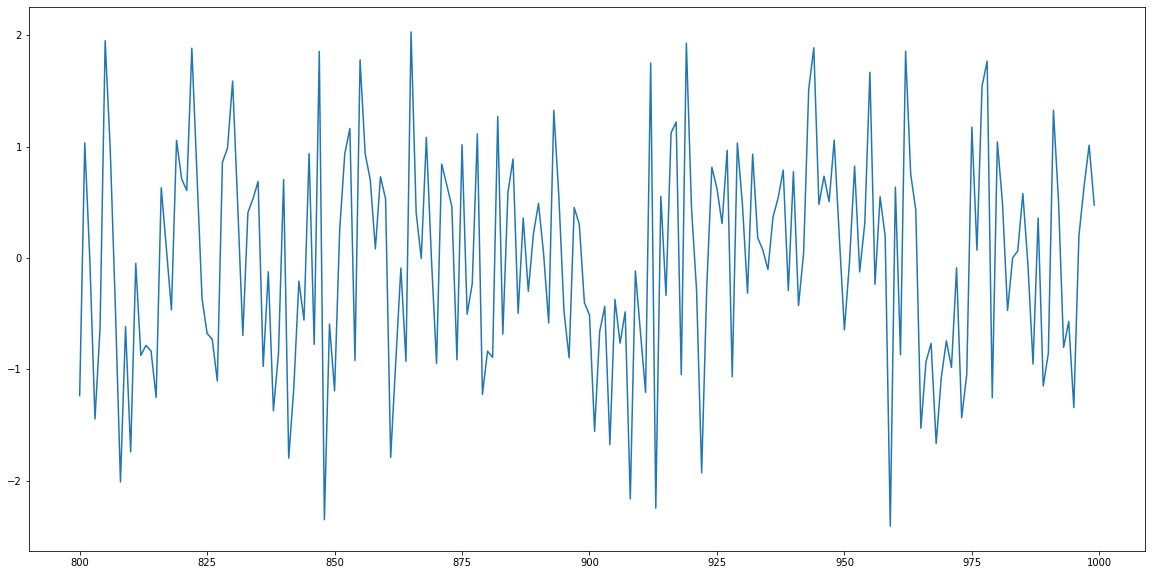

In [144]:
df_sem_nome['actual'].iloc[-200:].plot()

**Análise**:


Tanto no gráfico de correlação acumulada quanto na correlação parcial, não existe correlação entre os dados, nem mesmo no t-1. Média móvel bem próxima de zero indicando um caraterística de "Ruído Branco".

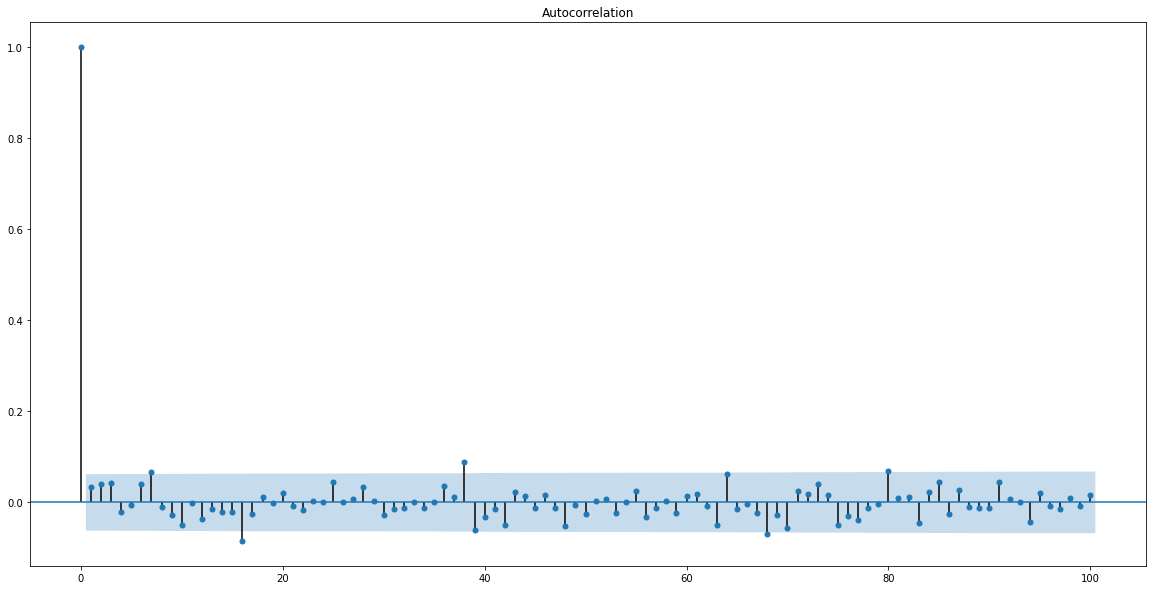

In [145]:
sm.graphics.tsa.plot_acf(df_sem_nome['actual'].values.squeeze(), lags=100)

plt.show()

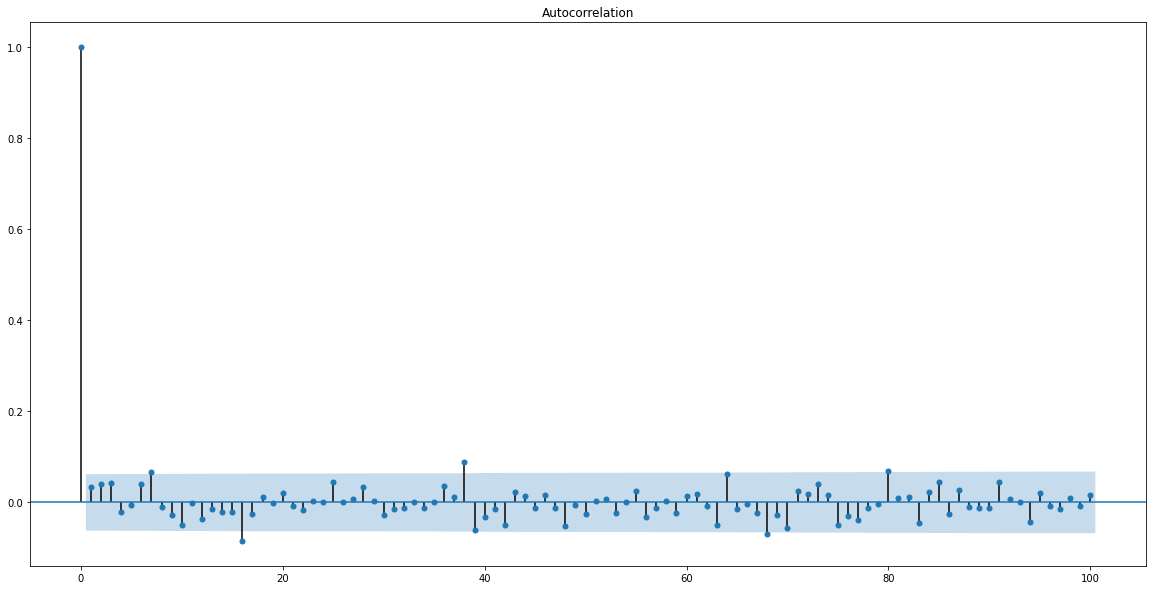

In [146]:
sm.graphics.tsa.plot_acf(df_sem_nome['actual'].values.squeeze(), lags=100)

plt.show()